In [54]:
pip install matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import train_test_split

In [56]:
df=pd.read_csv("dataset.csv")
df=df.drop(['Grade'],axis=1)

In [57]:
df.head(10)

,State,District,Market,Commodity,Variety,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,27-07-2023,8400.0,9000.0,8850.0
5,Gujarat,Amreli,Damnagar,Ginger(Green),Green Ginger,27-07-2023,11000.0,14000.0,12500.0
6,Gujarat,Amreli,Damnagar,Green Chilli,Green Chilly,27-07-2023,7200.0,8000.0,7550.0
7,Gujarat,Amreli,Damnagar,Guar,Gwar,27-07-2023,6800.0,7500.0,7350.0
8,Gujarat,Amreli,Damnagar,Lemon,Lemon,27-07-2023,1850.0,2550.0,2200.0
9,Gujarat,Amreli,Damnagar,Tomato,Local,27-07-2023,9800.0,10000.0,9950.0


In [58]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Arrival_Date  23093 non-null  object 
 6   Min Price     23093 non-null  float64
 7   Max Price     23093 non-null  float64
 8   Modal Price   23093 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.6+ MB


State           0
District        0
Market          0
Commodity       0
Variety         0
Arrival_Date    0
Min Price       0
Max Price       0
Modal Price     0
dtype: int64

In [59]:
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'],dayfirst=True)
df['Year'] = df['Arrival_Date'].dt.year
df['Month'] = df['Arrival_Date'].dt.month
df['Day'] = df['Arrival_Date'].dt.day
df['day_of_week'] = df['Arrival_Date'].dt.dayofweek
df['week_of_year'] = df['Arrival_Date'].dt.isocalendar().week

In [60]:
df.iloc[1583:1590]

,State,District,Market,Commodity,Variety,Arrival_Date,Min Price,Max Price,Modal Price,Year,Month,Day,day_of_week,week_of_year
1583,Karnataka,Chamrajnagar,Chamaraj Nagar,Tomato,Tomato,2023-07-28,3000.0,8000.0,7000.0,2023,7,28,4,30
1584,Karnataka,Chamrajnagar,Gundlupet,Beans,Beans (Whole),2023-07-28,4200.0,4200.0,4200.0,2023,7,28,4,30
1585,Karnataka,Chamrajnagar,Gundlupet,Green Chilli,Green Chilly,2023-07-28,5700.0,5700.0,5700.0,2023,7,28,4,30
1586,Karnataka,Chamrajnagar,Gundlupet,Tomato,Tomato,2023-07-28,8500.0,8520.0,8500.0,2023,7,28,4,30
1587,Karnataka,Chikmagalur,Bagepalli,Beans,Beans (Whole),2023-07-28,1800.0,2200.0,2000.0,2023,7,28,4,30
1588,Karnataka,Chikmagalur,Bagepalli,Beetroot,Beetroot,2023-07-28,1800.0,2200.0,2000.0,2023,7,28,4,30
1589,Karnataka,Chikmagalur,Bagepalli,Bhindi(Ladies Finger),Bhindi,2023-07-28,1400.0,1600.0,1500.0,2023,7,28,4,30


In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['State', 'District', 'Market', 'Commodity', 'Variety']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [62]:
features = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Year', 'Month', 'Day']
target = 'Modal Price'

X = df[features] 
y = df[target]    

In [63]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

In [64]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [65]:
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)

In [66]:
from sklearn.metrics import root_mean_squared_error

rmse_test = root_mean_squared_error(y_test, y_pred_test)
rmse_val = root_mean_squared_error(y_val, y_pred_val)

print(f"Test RMSE: {rmse_test:.2f}")
print(f"Validation RMSE: {rmse_val:.2f}")

Test RMSE: 2432.76
Validation RMSE: 2322.55


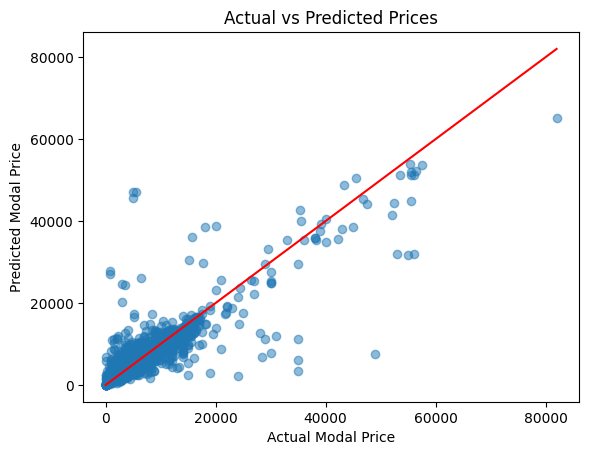

In [67]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Actual Modal Price")
plt.ylabel("Predicted Modal Price")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.show()

In [68]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_test)
print(f"MAE: {mae:.2f}")

MAE: 870.48


In [70]:
import numpy as np
model.predict([[6,12,309,86,182,2024,8,15]])

c:\Users\mahas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([11207.75])